In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter

## Ver 01

### 減少資料
- ticks = 5，每 t 個樣本取一個留下，其餘 t-1 個捨去。
- proportion = 0.3，取用多少比例的資料集，從頭開始取 p*total_len 筆，之後的資料捨去。

In [10]:
data = pd.read_csv("../MDS_Assignment3 Mining Process/MiningProcess_Flotation_Plant_Database.csv", decimal=',')
# data = data.replace(",", ".", regex=True) 
display(data.head(3))

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31


In [11]:
def reduce(data, ticks=5, proportion=0.3):
    print('original data.shape:', data.shape)
    data = data[0:len(data):ticks] # ticks
    data =data.reset_index(drop=True)
    print('after apply ticks data.shape:', data.shape)
    data = data[0:int(len(data)*proportion)] # proportion
    data =data.reset_index(drop=True)
    print('after apply proportion data.shape:', data.shape)
    try:
        start = data.loc[0, 'date']
        end = data.loc[len(data)-1, 'date']
        print(f'Datetime interval: {start} ~ {end}')
    except:
        pass
    return data

In [12]:
data = reduce(data)
data_X = data.iloc[:, 1:-2].astype(float) # params
data_y = data.iloc[:, -1].astype(float) # label

original data.shape: (737453, 24)
after apply ticks data.shape: (147491, 24)
after apply proportion data.shape: (44247, 24)
Datetime interval: 2017-03-10 01:00:00 ~ 2017-05-13 12:00:00


### Train test split

In [13]:
# train : validation : test = 3 : 1 : 1 = 60% : 20% : 20%
import numpy as np 
data_X = data_X.to_numpy()
data_y = data_y.to_numpy()
len_ = len(data_X)
# data
x_train, x_test = np.split(data_X, [int(.60 *len_)])
x_val, x_test = np.split(x_test, [int(.50 *len(x_test))])
# target
y_train, y_test = np.split(data_y, [int(.60 *len_)])
y_val, y_test = np.split(y_test, [int(.50 *len(y_test))])

print('x_train:', x_train.shape, ', y_train:', y_train.shape, 
    '\nx_val:  ', x_val.shape, ', y_val:  ', y_val.shape,
    '\nx_test: ', x_test.shape, ', y_test: ', y_test.shape)

# save
np.savetxt("reduceddata-ticks-5/x_train.csv", x_train, delimiter=",")
np.savetxt("reduceddata-ticks-5/x_val.csv", x_val, delimiter=",")
np.savetxt("reduceddata-ticks-5/x_test.csv", x_test, delimiter=",")
np.savetxt("reduceddata-ticks-5/y_train.csv", y_train, delimiter=",")
np.savetxt("reduceddata-ticks-5/y_val.csv", y_val, delimiter=",")
np.savetxt("reduceddata-ticks-5/y_test.csv", y_test, delimiter=",")

x_train: (26548, 21) , y_train: (26548,) 
x_val:   (8849, 21) , y_val:   (8849,) 
x_test:  (8850, 21) , y_test:  (8850,)


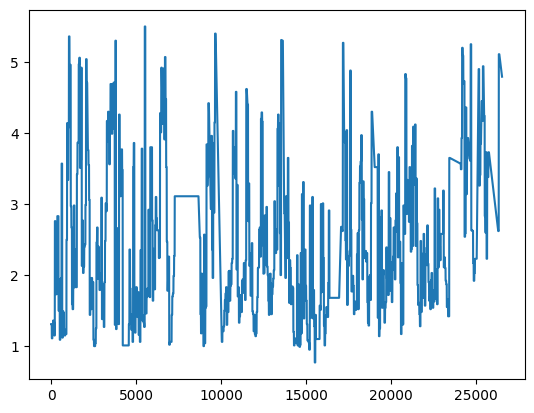

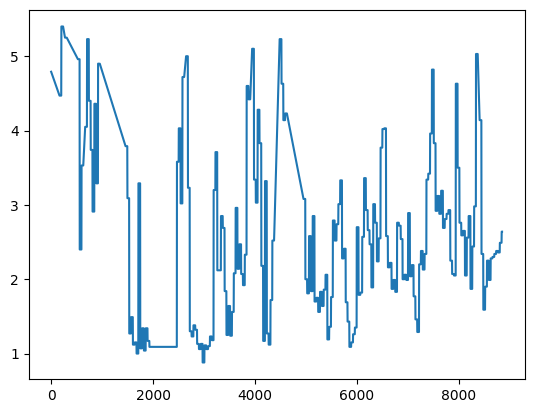

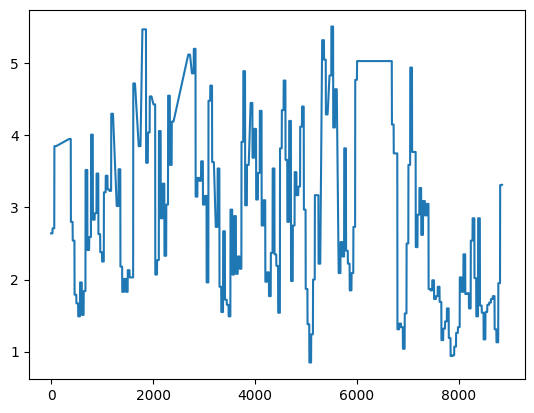

In [14]:
plt.plot(y_train)
plt.show()
plt.plot(y_val)
plt.show()
plt.plot(y_test)
plt.show()

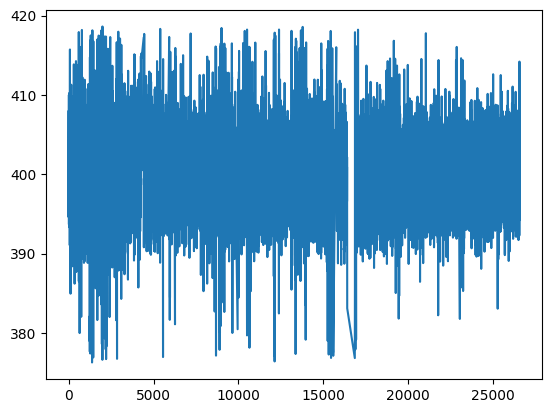

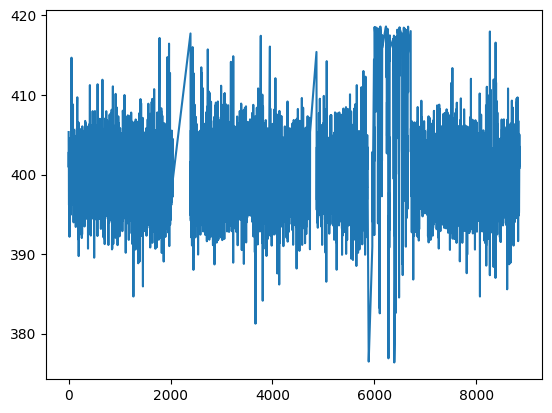

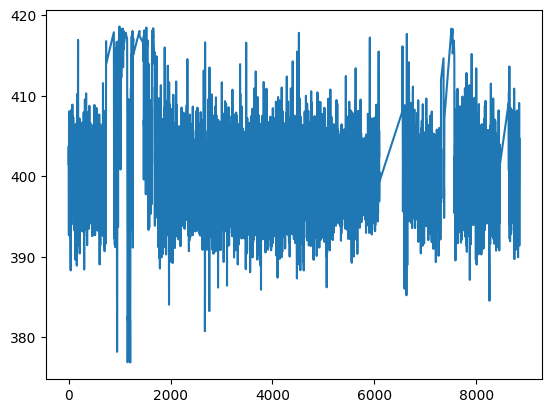

In [15]:
plt.plot(x_train[:,4])
plt.show()
plt.plot(x_val[:,4])
plt.show()
plt.plot(x_test[:,4])
plt.show()

### Apply Normalization to data
用 x_train 的資料當作基準，調整為平均值0，標準差1，因為我們無法偷看 x_val 和 x_test。

[[-0.38037143  0.70263315  0.81896641  0.92927592 -0.7020957   1.69222467
   0.42527186  0.43098847  0.62418401  0.50494304 -0.55963826  0.68297245
   0.08413877  0.32585451 -1.62890735 -1.60551867 -1.7595742   0.12696779
   0.77379595 -0.14018047  0.92803321]]
[[-0.39101689  0.06928033 -0.08139456  0.87404614  1.02311723  0.09926508
   0.53524516  0.59367885  0.57002184  0.45392672  3.16229447 -0.31237794
   0.01005063  0.03724919 -0.68628842 -0.38392092 -0.43847902 -0.82117806
  -0.28038724 -0.59098479 -0.43986634]
 [-0.39101689  0.06928033 -0.07092453  0.89689157  0.41129764  0.05638521
   0.53135341  0.48416813  0.66960879  0.56153129  3.16279327 -0.31205704
  -0.02827082 -0.53927428 -0.65914531 -0.56054239 -0.51935398  0.58818643
   0.43794297 -0.74560796 -0.32620436]]


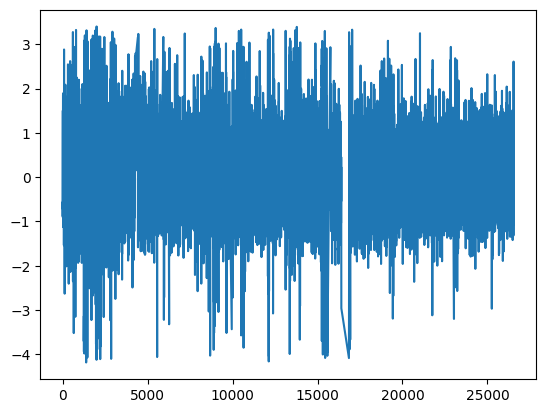

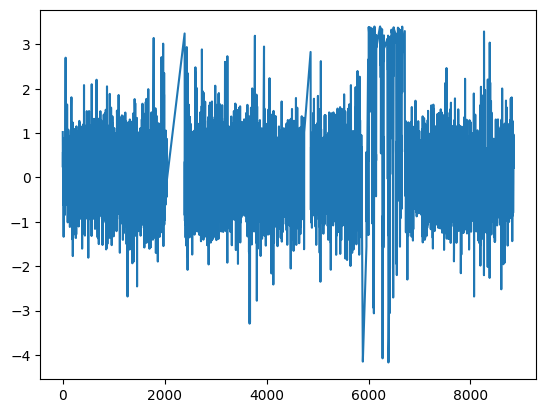

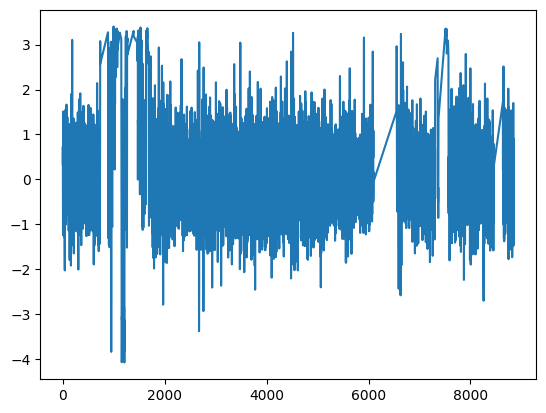

In [17]:
from sklearn.preprocessing import StandardScaler
import joblib
scaler = StandardScaler()
scaler.fit(x_train)

print(scaler.transform([x_train[0]])) # test a record
print(scaler.transform(x_val[0:2])) # test 2 records
# scaler.inverse_transform() # Scale back the data to the original representation.

scaler_filename = "reduceddata-ticks-5/scaler.save"
joblib.dump(scaler, scaler_filename) 

# And now to load...

scaler = joblib.load(scaler_filename) 
x_train_norm = scaler.transform(x_train)
x_val_norm = scaler.transform(x_val)
x_test_norm = scaler.transform(x_test)
plt.plot(x_train_norm[:,4])
plt.show()
plt.plot(x_val_norm[:,4])
plt.show()
plt.plot(x_test_norm[:,4])
plt.show()

# save
np.savetxt("reduceddata-ticks-5/x_train_norm.csv", x_train_norm, delimiter=",")
np.savetxt("reduceddata-ticks-5/x_val_norm.csv", x_val_norm, delimiter=",")
np.savetxt("reduceddata-ticks-5/x_test_norm.csv", x_test_norm, delimiter=",")

y 取 log

origin y_train: [1.31 1.31 1.31 1.31 1.31]
adjusted y_train (log2): [0.38956681 0.38956681 0.38956681 0.38956681 0.38956681]
inverse y_train: [1.31 1.31 1.31 1.31 1.31]


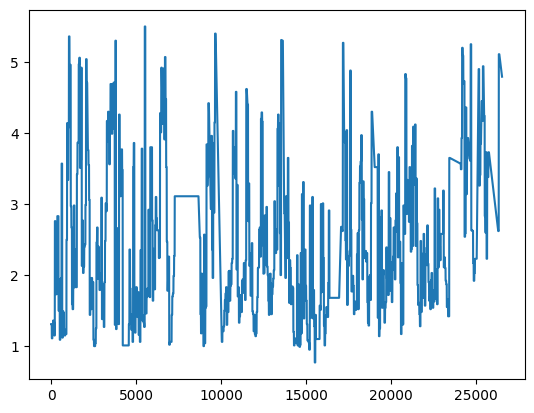

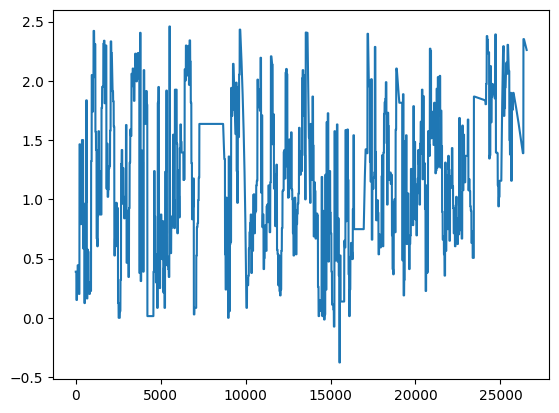

In [18]:
from math import log2
y_train_log = np.array([log2(yi) for yi in y_train])
inverse_y_train = np.array([2**ylog for ylog in y_train_log])
print('origin y_train:', y_train[:5])
print('adjusted y_train (log2):',  y_train_log[:5])
print('inverse y_train:', inverse_y_train[:5])
plt.plot(y_train)
plt.show()
plt.plot(y_train_log)
plt.show()

y_train_log = np.array([log2(yi) for yi in y_train])
y_val_log = np.array([log2(yi) for yi in y_val])
y_test_log = np.array([log2(yi) for yi in y_test])
np.savetxt("reduceddata-ticks-5/y_train_log.csv", y_train_log, delimiter=",")
np.savetxt("reduceddata-ticks-5/y_val_log.csv", y_val_log, delimiter=",")
np.savetxt("reduceddata-ticks-5/y_test_log.csv", y_test_log, delimiter=",")

In [19]:
### 計算 y 的平均數和標準差
ydata_list = [y_train, y_val, y_test, y_train_log, y_val_log, y_test_log]
ydata_name = ["y_train", "y_val", "y_test", "y_train_log", "y_val_log", "y_test_log"]
for i, ydata in enumerate(ydata_list):
    mean = np.mean(ydata)
    std = np.std(ydata)
    print(f'{ydata_name[i]:12}: mean {mean}, std {std}')

y_train     : mean 2.55966404776741, std 1.0891259787142349
y_val       : mean 2.769432362659577, std 1.2694028111026328
y_test      : mean 3.1262021838255705, std 1.2498255920845271
y_train_log : mean 1.2223368358479372, std 0.6302559011974435
y_val_log   : mean 1.3029576640945206, std 0.7156895932173657
y_test_log  : mean 1.5127885080708658, std 0.6419132759050055


## Ver 02:
### Ticks = 12
- 平均值顯示 y 值平均每 12 個樣本才會變動一次，故取 ticks = 12 (4分鐘1樣本)
- 第564471筆資料~第576971筆，共 13140 筆相同y值的資料，刪掉此段數據

In [20]:
data = pd.read_csv("../MDS_Assignment3 Mining Process/MiningProcess_Flotation_Plant_Database.csv", decimal=',')
# data = data.replace(",", ".", regex=True) 
data = data.drop(data.index[list(range(442471+122000,442471+134500))])
display(data.head(2))

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31


In [21]:
def reduce(data, ticks=5, proportion=0.3):
    print('original data.shape:', data.shape)
    data = data[0:len(data):ticks] # ticks
    data =data.reset_index(drop=True)
    print('after apply ticks data.shape:', data.shape)
    data = data[0:int(len(data)*proportion)] # proportion
    data =data.reset_index(drop=True)
    print('after apply proportion data.shape:', data.shape)
    try:
        start = data.loc[0, 'date']
        end = data.loc[len(data)-1, 'date']
        print(f'Datetime interval: {start} ~ {end}')
    except:
        pass
    return data

data = reduce(data, ticks=12, proportion=1)
data_X = data.iloc[:, 1:-2].astype(float) # params
data_y = data.iloc[:, -1].astype(float) # label

original data.shape: (724953, 24)
after apply ticks data.shape: (60413, 24)
after apply proportion data.shape: (60413, 24)
Datetime interval: 2017-03-10 01:00:00 ~ 2017-09-09 23:00:00


### Train Test Split

In [22]:
# train : validation : test = 3 : 1 : 1 = 60% : 20% : 20%
import numpy as np 
data_X = data_X.to_numpy()
data_y = data_y.to_numpy()
len_ = len(data_X)
# data
x_train, x_test = np.split(data_X, [int(.60 *len_)])
x_val, x_test = np.split(x_test, [int(.50 *len(x_test))])
# target
y_train, y_test = np.split(data_y, [int(.60 *len_)])
y_val, y_test = np.split(y_test, [int(.50 *len(y_test))])

print('x_train:', x_train.shape, ', y_train:', y_train.shape, 
    '\nx_val:  ', x_val.shape, ', y_val:  ', y_val.shape,
    '\nx_test: ', x_test.shape, ', y_test: ', y_test.shape)

# save
foldername = 'reduceddata-ticks-12'
np.savetxt(f"{foldername}/x_train.csv", x_train, delimiter=",")
np.savetxt(f"{foldername}/x_val.csv", x_val, delimiter=",")
np.savetxt(f"{foldername}/x_test.csv", x_test, delimiter=",")
np.savetxt(f"{foldername}/y_train.csv", y_train, delimiter=",")
np.savetxt(f"{foldername}/y_val.csv", y_val, delimiter=",")
np.savetxt(f"{foldername}/y_test.csv", y_test, delimiter=",")

x_train: (36247, 21) , y_train: (36247,) 
x_val:   (12083, 21) , y_val:   (12083,) 
x_test:  (12083, 21) , y_test:  (12083,)


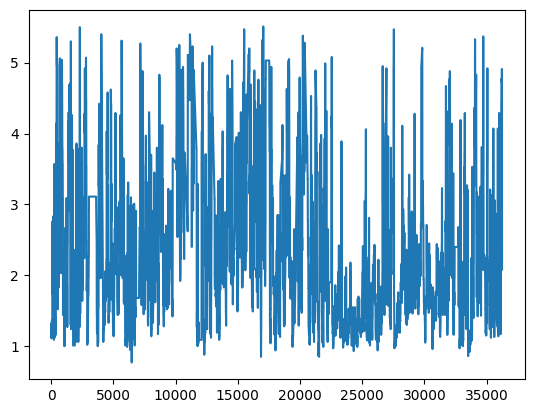

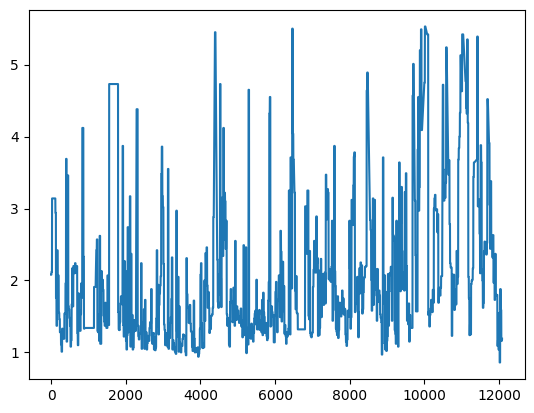

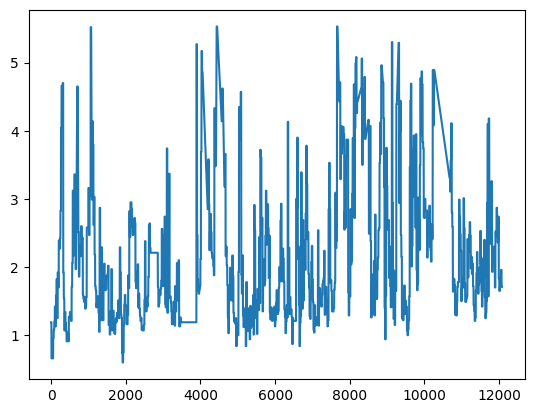

In [23]:
plt.plot(y_train)
plt.show()
plt.plot(y_val)
plt.show()
plt.plot(y_test)
plt.show()

### Apply Normalization to data
X: norm

[[-0.51551158  0.61316386  0.30205188  0.79453055 -0.83387425  1.06144693
   0.8186305  -0.73208506 -0.49376572 -0.71430036 -1.58470574  1.60158499
  -1.32149108 -1.31364489 -0.59310716 -0.72954924 -0.7718161   0.30292932
   1.00975453  0.18264866  1.22847029]]
[[-1.53295982  1.77538229 -0.6571859   1.08669174 -1.72993262  1.39987318
   0.55164734  0.84062694  0.94184459  0.94679099  0.62728822 -0.40216606
   0.58340932  0.59690889 -0.96815922 -0.87812114 -0.93732515 -0.06866248
  -0.24257931 -0.18578959 -0.44022559]
 [-1.53295982  1.77538229 -0.78173568  0.9846362  -0.91401243  1.39544517
   0.37387658  0.92057667  1.11252384  0.85027961  0.51563919 -0.26383545
   0.60154196  0.81748348 -1.10531918 -0.99003365 -0.9422773   0.04653224
  -0.30439253 -0.58847134 -0.35501852]]


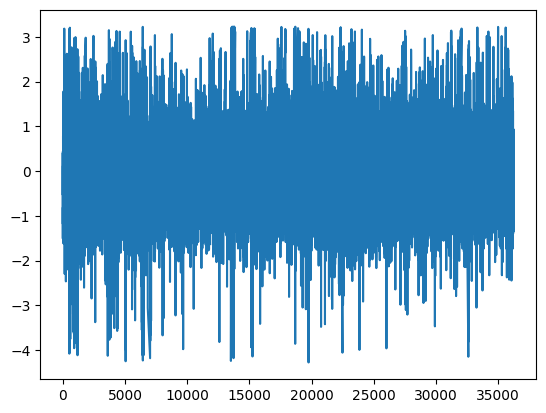

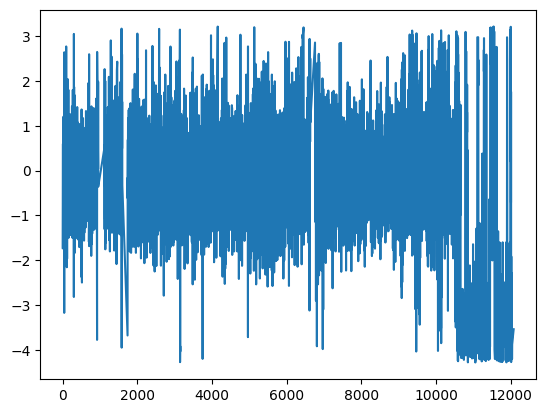

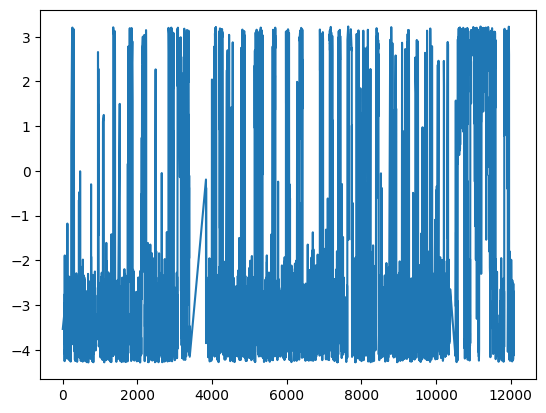

In [24]:
from sklearn.preprocessing import StandardScaler
import joblib
scaler = StandardScaler()
scaler.fit(x_train)

print(scaler.transform([x_train[0]])) # test a record
print(scaler.transform(x_val[0:2])) # test 2 records
# scaler.inverse_transform() # Scale back the data to the original representation.

scaler_filename = f"{foldername}/scaler.save"
joblib.dump(scaler, scaler_filename) 

# And now to load...

scaler = joblib.load(scaler_filename) 
x_train_norm = scaler.transform(x_train)
x_val_norm = scaler.transform(x_val)
x_test_norm = scaler.transform(x_test)
plt.plot(x_train_norm[:,4])
plt.show()
plt.plot(x_val_norm[:,4])
plt.show()
plt.plot(x_test_norm[:,4])
plt.show()

# save
np.savetxt(f"{foldername}/x_train_norm.csv", x_train_norm, delimiter=",")
np.savetxt(f"{foldername}/x_val_norm.csv", x_val_norm, delimiter=",")
np.savetxt(f"{foldername}/x_test_norm.csv", x_test_norm, delimiter=",")

y: log2

origin y_train: [1.31 1.31 1.31 1.31 1.31]
adjusted y_train (log2): [0.38956681 0.38956681 0.38956681 0.38956681 0.38956681]
inverse y_train: [1.31 1.31 1.31 1.31 1.31]


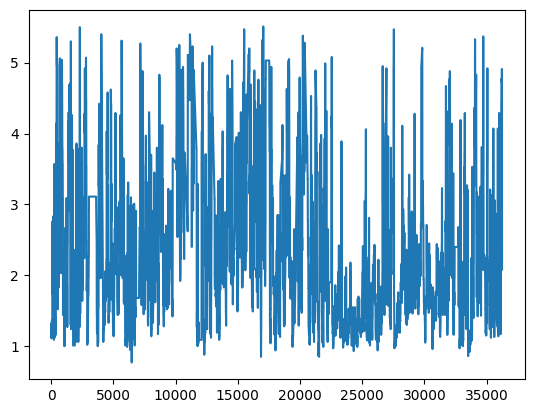

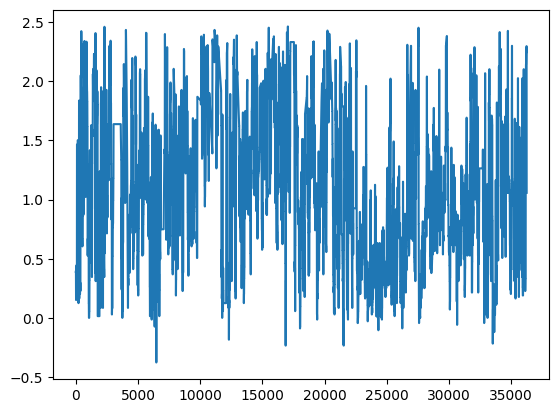

In [25]:
from math import log2
y_train_log = np.array([log2(yi) for yi in y_train])
inverse_y_train = np.array([2**ylog for ylog in y_train_log])
print('origin y_train:', y_train[:5])
print('adjusted y_train (log2):',  y_train_log[:5])
print('inverse y_train:', inverse_y_train[:5])
plt.plot(y_train)
plt.show()
plt.plot(y_train_log)
plt.show()

y_train_log = np.array([log2(yi) for yi in y_train])
y_val_log = np.array([log2(yi) for yi in y_val])
y_test_log = np.array([log2(yi) for yi in y_test])
np.savetxt(f"{foldername}/y_train_log.csv", y_train_log, delimiter=",")
np.savetxt(f"{foldername}/y_val_log.csv", y_val_log, delimiter=",")
np.savetxt(f"{foldername}/y_test_log.csv", y_test_log, delimiter=",")

In [26]:
### 計算 y 的平均數和標準差
ydata_list = [y_train, y_val, y_test, y_train_log, y_val_log, y_test_log]
ydata_name = ["y_train", "y_val", "y_test", "y_train_log", "y_val_log", "y_test_log"]
for i, ydata in enumerate(ydata_list):
    mean = np.mean(ydata)
    std = np.std(ydata)
    print(f'{ydata_name[i]:12}: mean {mean}, std {std}')

y_train     : mean 2.4056825599620546, std 1.1341051476808566
y_val       : mean 2.131191720868766, std 1.096073551035217
y_test      : mean 2.3069593838175453, std 1.1495374850122542
y_train_log : mean 1.1134989735896745, std 0.6617674122413686
y_val_log   : mean 0.9356435571780742, std 0.6427038087991539
y_test_log  : mean 1.040345764844514, std 0.6832257274031739
